In [63]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras import backend as K

In [64]:
X_test   = idx2numpy.convert_from_file('t10k-images-idx3-ubyte')
y_test   = idx2numpy.convert_from_file('t10k-labels-idx1-ubyte')
X_train  = idx2numpy.convert_from_file('train-images-idx3-ubyte')
y_train  = idx2numpy.convert_from_file('train-labels-idx1-ubyte')

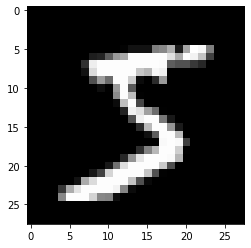

5

In [65]:
plt.imshow(X_train[0], cmap='gray')
plt.show()
y_train[0]

In [66]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [67]:
X_train = X_train/255
X_test  = X_test/255

In [68]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test  = keras.utils.to_categorical(y_test, 10)

In [69]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2,2), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))
score=model.evaluate(X_test, y_test)
print(score[0])
print(score[1])



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.4289 - accuracy: 0.8862 - val_loss: 0.2336 - val_accuracy: 0.9328
Epoch 2/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.2035 - accuracy: 0.9424 - val_loss: 0.1677 - val_accuracy: 0.9563
Epoch 3/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.1407 - accuracy: 0.9612 - val_loss: 0.1218 - val_accuracy: 0.9654
Epoch 4/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.1085 - accuracy: 0.9699 - val_loss: 0.1010 - val_accuracy: 0.9706
Epoch 5/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0900 - accuracy: 0.9756 - val_loss: 0.0887 - val_accuracy: 0.9743
Epoch 6/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.0776 - accuracy: 0.9781 - val_loss: 0.0803 - val_accuracy: 0.9761
Epoch 7/10
60000/60000 [==============================]

In [ ]:
This model's accuracy is 97.87% on test data not used for training